# CAR PRICE PREDICTION

With the covid 19 impact in the market, we have seen lot of changes in the car market. Now some 
cars are in demand hence making them costly and some are not in demand hence cheaper. One 
of our clients works with small traders, who sell used cars. With the change in market due to covid 
19 impact, our client is facing problems with their previous car price valuation machine learning 
models. So, they are looking for new machine learning models from new data. We have to make 
car price valuation model. This project contains two phase

### Data Collection Phase
You have to scrape at least 5000 used cars data. You can scrape more data as well, it’s up to you. 
more the data better the model
In this section You need to scrape the data of used cars from websites (Olx, cardekho, Cars24 
etc.) You need web scraping for this. You have to fetch data for different locations. The number of
columns for data doesn’t have limit, it’s up to you and your creativity. Generally, these columns are 
Brand, model, variant, manufacturing year, driven kilometers, fuel, number of owners, location and 
at last target variable Price of the car. This data is to give you a hint about important variables in 
used car model. You can make changes to it, you can add or you can remove some columns, it 
completely depends on the website from which you are fetching the data.
Try to include all types of cars in your data for example- SUV, Sedans, Coupe, minivan, 
Hatchback.
Note – The data which you are collecting is important to us. Kindly don’t share it on any public platforms.

### Model Building Phase
After collecting the data, you need to build a machine learning model. Before model building do all 
data pre-processing steps. Try different models with different hyper parameters and select the best 
model.
Follow the complete life cycle of data science. Include all the steps like.
1. Data Cleaning
2. Exploratory Data Analysis
3. Data Pre-processing
4. Model Building
5. Model Evaluation
6. Selecting the best model

# Importing necessary libraries

In [1]:
# Preprocessing
import numpy as np
import pandas as pd

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
import os
import scipy as stats
from scipy.stats import zscore   # To remove outliers
from sklearn.preprocessing import PowerTransformer  # To remove skewness

# Evaluation Metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from sklearn import metrics

# ML Algorithms
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import BaggingRegressor
import xgboost as xgb
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.model_selection import GridSearchCV
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

# Loading the dataset

In [2]:
df = pd.read_csv("used_cars.csv")
df

,MNF_YEAR,BRAND,MODEL,VARIANT,DRIVEN_KM,FUELTYPE,NOOF_OWNERS,PRICE
0,2021,Mahindra,XUV 3OO 1.2 W6 MT,NaN,"8,387 km",PetrolUP-14,1st Owner,"₹9,21,699"
1,2020,Mahindra,XUV 3OO 1.2 W6 MT,NaN,"18,028 km",PetrolDL-10,1st Owner,"₹8,92,649"
2,2022,Mahindra,XUV 3OO 1.2 W6 AT,NaN,"21,859 km",PetrolDL-1C,1st Owner,"₹10,50,499"
3,2018,Mahindra,KUV 100 NXT K2 D 6S,Manual,"65,179 km",DieselDL-10,1st Owner,"₹4,54,599"
4,2020,Mahindra,KUV 100 NXT K8 6 STR,Manual,"26,577 km",PetrolDL-8C,1st Owner,"₹6,89,899"
...,...,...,...,...,...,...,...,...
2015,2019,MG,HECTOR SHARP 2.0 DIESEL,Manual,"55,691 km",DieselGJ-03,2nd Owner,"₹14,95,099"
2016,2020,Honda,WR-V 1.2 i-VTEC VX MT,Manual,"47,489 km",PetrolGJ-06,1st Owner,"₹8,20,599"
2017,2022,Hyundai,Creta SX PETROL MT,Manual,"1,354 km",PetrolGJ-01,1st Owner,"₹15,24,999"
2018,2020,MG,HECTOR SHARP DCT PETROL,Automatic,"38,544 km",PetrolGJ-03,1st Owner,"₹15,59,399"


In [3]:
 # Checking top 5 and bottom 5 rows of the dataset.
df.head()

,MNF_YEAR,BRAND,MODEL,VARIANT,DRIVEN_KM,FUELTYPE,NOOF_OWNERS,PRICE
0,2021,Mahindra,XUV 3OO 1.2 W6 MT,NaN,"8,387 km",PetrolUP-14,1st Owner,"₹9,21,699"
1,2020,Mahindra,XUV 3OO 1.2 W6 MT,NaN,"18,028 km",PetrolDL-10,1st Owner,"₹8,92,649"
2,2022,Mahindra,XUV 3OO 1.2 W6 AT,NaN,"21,859 km",PetrolDL-1C,1st Owner,"₹10,50,499"
3,2018,Mahindra,KUV 100 NXT K2 D 6S,Manual,"65,179 km",DieselDL-10,1st Owner,"₹4,54,599"
4,2020,Mahindra,KUV 100 NXT K8 6 STR,Manual,"26,577 km",PetrolDL-8C,1st Owner,"₹6,89,899"


In [4]:
df.tail()

,MNF_YEAR,BRAND,MODEL,VARIANT,DRIVEN_KM,FUELTYPE,NOOF_OWNERS,PRICE
2015,2019,MG,HECTOR SHARP 2.0 DIESEL,Manual,"55,691 km",DieselGJ-03,2nd Owner,"₹14,95,099"
2016,2020,Honda,WR-V 1.2 i-VTEC VX MT,Manual,"47,489 km",PetrolGJ-06,1st Owner,"₹8,20,599"
2017,2022,Hyundai,Creta SX PETROL MT,Manual,"1,354 km",PetrolGJ-01,1st Owner,"₹15,24,999"
2018,2020,MG,HECTOR SHARP DCT PETROL,Automatic,"38,544 km",PetrolGJ-03,1st Owner,"₹15,59,399"
2019,2021,Mahindra,Thar LX PETROL AT 4WD,Automatic,"1,254 km",PetrolGJ-05,1st Owner,"₹15,60,999"


In [5]:
# checking sample rows of the dataset.
df.sample(15)

,MNF_YEAR,BRAND,MODEL,VARIANT,DRIVEN_KM,FUELTYPE,NOOF_OWNERS,PRICE
346,2013,Mercedes,Benz E Class E 220 CDI ELEGANCE,Automatic,"53,524 km",DieselHR-26,1st Owner,"₹10,67,899"
549,2017,Toyota,Corolla Altis GL,Manual,"44,929 km",PetrolDL-10,2nd Owner,"₹12,59,999"
876,2018,Toyota,YARIS J MT,Manual,"28,635 km",PetrolMH-14,1st Owner,"₹8,12,499"
79,2017,Maruti,Dzire VXI,Manual,"31,712 km",PetrolDL-9C,1st Owner,"₹6,38,099"
615,2016,Maruti,Vitara Brezza ZDI,Manual,"54,904 km",DieselDL-12,1st Owner,"₹6,04,099"
1741,2018,Toyota,Corolla Altis VL AT,Automatic,"34,174 km",PetrolWB-06,2nd Owner,"₹14,64,099"
394,2018,Hyundai,Tucson New 2WD MT PETROL,Manual,"86,327 km",PetrolUP-14,2nd Owner,"₹15,09,599"
173,2021,Skoda,Rapid ACTIVE 1.0 TSI,Manual,"32,613 km",PetrolHR-11,1st Owner,"₹9,08,299"
1078,2016,Hyundai,Verna FLUIDIC 1.6 SX VTVT,Manual,"38,379 km",PetrolKA-53,1st Owner,"₹7,68,399"
1391,2019,Maruti,S Cross DELTA SHVS,Manual,"21,892 km",DieselTS-08,1st Owner,"₹10,48,899"


# Exploratory Data Analysis (EDA)

In [6]:
df.shape

(2020, 8)

- We can see that our dataset is having 1920 rows and 8 columns.

In [7]:
df.columns

Index(['MNF_YEAR', 'BRAND', 'MODEL', 'VARIANT', 'DRIVEN_KM', 'FUELTYPE',
       'NOOF_OWNERS', 'PRICE'],
      dtype='object')

'Price' column is our target variable.

In [8]:
# Lets check the datatypes:
df.dtypes

MNF_YEAR        int64
BRAND          object
MODEL          object
VARIANT        object
DRIVEN_KM      object
FUELTYPE       object
NOOF_OWNERS    object
PRICE          object
dtype: object

In [9]:
# Checking number of unique values in each column of dataset
df.nunique().to_frame("No of Unique Values")

,No of Unique Values
MNF_YEAR,14
BRAND,19
MODEL,503
VARIANT,2
DRIVEN_KM,1176
FUELTYPE,271
NOOF_OWNERS,3
PRICE,1134


Above are the number of unique values present in each of the columns of the dataset.

In [10]:
# To get good overview of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2020 entries, 0 to 2019
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   MNF_YEAR     2020 non-null   int64 
 1   BRAND        2020 non-null   object
 2   MODEL        2020 non-null   object
 3   VARIANT      1976 non-null   object
 4   DRIVEN_KM    2020 non-null   object
 5   FUELTYPE     2020 non-null   object
 6   NOOF_OWNERS  2020 non-null   object
 7   PRICE        2020 non-null   object
dtypes: int64(1), object(7)
memory usage: 126.4+ KB


- We can see that there are 7 object datatypes and 1 numerical datatye.

In [11]:
#Checking for Null Values
df.isnull().sum()

MNF_YEAR        0
BRAND           0
MODEL           0
VARIANT        44
DRIVEN_KM       0
FUELTYPE        0
NOOF_OWNERS     0
PRICE           0
dtype: int64

<AxesSubplot:>

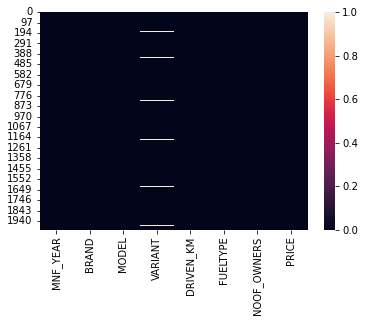

In [12]:
#Checking for Null Values using heatmap
sns.heatmap(df.isnull())

- We can see there are NULL values in our Dataset. So, we will handle it.

### Checking if - values present in dataset or not

In [13]:
(df=='-').sum()

MNF_YEAR       0
BRAND          0
MODEL          0
VARIANT        0
DRIVEN_KM      0
FUELTYPE       0
NOOF_OWNERS    0
PRICE          0
dtype: int64

# Data Cleaning

In [14]:
#We cannot fill any value in "Variant" as it is unique for each car model, and also we cann't drop column as it have very less missing value. So, we will drop those rows only.
df.dropna(inplace = True)

### Checking all values in each columns

In [15]:
for i in df.columns:
    print(df[i].value_counts(),"\n\n", "-"*100, "\n\n")

2018    363
2019    355
2017    265
2020    217
2021    208
2016    173
2014    142
2015    116
2013     53
2022     29
2012     22
2010     15
2011     11
2009      7
Name: MNF_YEAR, dtype: int64 

 ---------------------------------------------------------------------------------------------------- 


Maruti        557
Hyundai       399
Honda         250
Toyota        114
Ford          106
Jeep          102
Mahindra       98
Tata           77
Renault        64
Volkswagen     44
Skoda          39
Audi           35
MG             31
KIA            27
Mercedes       17
Datsun          8
Jaguar          6
BMW             1
Nissan          1
Name: BRAND, dtype: int64 

 ---------------------------------------------------------------------------------------------------- 


Dzire VXI                  41
City V MT PETROL           39
Amaze 1.2 SMT I VTEC       28
Swift Dzire VXI            28
Corolla Altis VL AT        24
                           ..
Grand i10 ASTA 1.2 VTVT     1
Swift ZXI A

In [16]:
df

,MNF_YEAR,BRAND,MODEL,VARIANT,DRIVEN_KM,FUELTYPE,NOOF_OWNERS,PRICE
3,2018,Mahindra,KUV 100 NXT K2 D 6S,Manual,"65,179 km",DieselDL-10,1st Owner,"₹4,54,599"
4,2020,Mahindra,KUV 100 NXT K8 6 STR,Manual,"26,577 km",PetrolDL-8C,1st Owner,"₹6,89,899"
5,2022,Maruti,Vitara Brezza VXI,Manual,"8,140 km",PetrolUP-16,1st Owner,"₹10,42,799"
6,2016,Maruti,Vitara Brezza ZDI,Manual,"54,904 km",DieselDL-12,1st Owner,"₹6,04,099"
7,2019,Hyundai,Creta 1.6 SX VTVT,Manual,"12,143 km",PetrolDL-12,1st Owner,"₹12,55,199"
...,...,...,...,...,...,...,...,...
2015,2019,MG,HECTOR SHARP 2.0 DIESEL,Manual,"55,691 km",DieselGJ-03,2nd Owner,"₹14,95,099"
2016,2020,Honda,WR-V 1.2 i-VTEC VX MT,Manual,"47,489 km",PetrolGJ-06,1st Owner,"₹8,20,599"
2017,2022,Hyundai,Creta SX PETROL MT,Manual,"1,354 km",PetrolGJ-01,1st Owner,"₹15,24,999"
2018,2020,MG,HECTOR SHARP DCT PETROL,Automatic,"38,544 km",PetrolGJ-03,1st Owner,"₹15,59,399"


In [17]:
#checking again null values
df.isnull().sum()

MNF_YEAR       0
BRAND          0
MODEL          0
VARIANT        0
DRIVEN_KM      0
FUELTYPE       0
NOOF_OWNERS    0
PRICE          0
dtype: int64

In [18]:
df.shape

(1976, 8)

# Statistical Description

In [19]:
df.describe()

,MNF_YEAR
count,1976.000000
mean,2017.668522
std,2.444097
min,2009.000000
25%,2016.000000
50%,2018.000000
75%,2019.000000
max,2022.000000


- We can see that only 1 column is having continuous data other rest columns have categorical data.

#### We can see that price column and Driven_KM is a numerical column but it is reflecting as object datatype because of sign ''₹'' and "km" in it.

In [20]:
df["DRIVEN_KM"]= df["DRIVEN_KM"].str.replace('km', '')

In [21]:
df["PRICE"]= df["PRICE"].str.replace('₹', '')

In [22]:
df.head()

,MNF_YEAR,BRAND,MODEL,VARIANT,DRIVEN_KM,FUELTYPE,NOOF_OWNERS,PRICE
3,2018,Mahindra,KUV 100 NXT K2 D 6S,Manual,"65,179",DieselDL-10,1st Owner,"4,54,599"
4,2020,Mahindra,KUV 100 NXT K8 6 STR,Manual,"26,577",PetrolDL-8C,1st Owner,"6,89,899"
5,2022,Maruti,Vitara Brezza VXI,Manual,"8,140",PetrolUP-16,1st Owner,"10,42,799"
6,2016,Maruti,Vitara Brezza ZDI,Manual,"54,904",DieselDL-12,1st Owner,"6,04,099"
7,2019,Hyundai,Creta 1.6 SX VTVT,Manual,"12,143",PetrolDL-12,1st Owner,"12,55,199"


# Checking Description through heatmap also

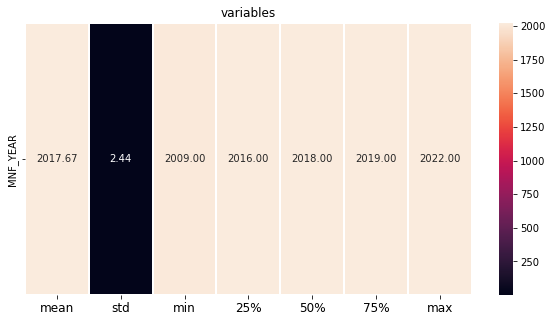

In [23]:
plt.figure(figsize=(10,5))
sns.heatmap(round(df.describe()[1:].transpose(),2),linewidth=2,annot=True,fmt='.2f')
plt.xticks(fontsize=18)
plt.xticks(fontsize=12)
plt.title('variables')
plt.show()

# Data Visualization

### Univariate Analysis

##### Using Countplot

<AxesSubplot:xlabel='count', ylabel='BRAND'>

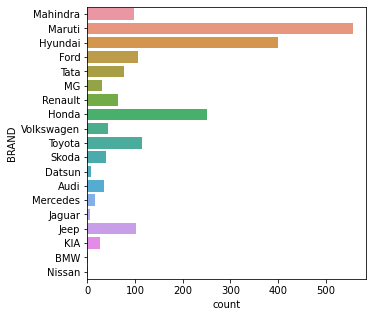

In [25]:
#Count Plot for "Brand" column
plt.figure(figsize=(5,5))
sns.countplot(y="BRAND",data=df)

- We can see that count of Maruti and Hyundai is more, followed by Honda.

<AxesSubplot:xlabel='count', ylabel='MODEL'>

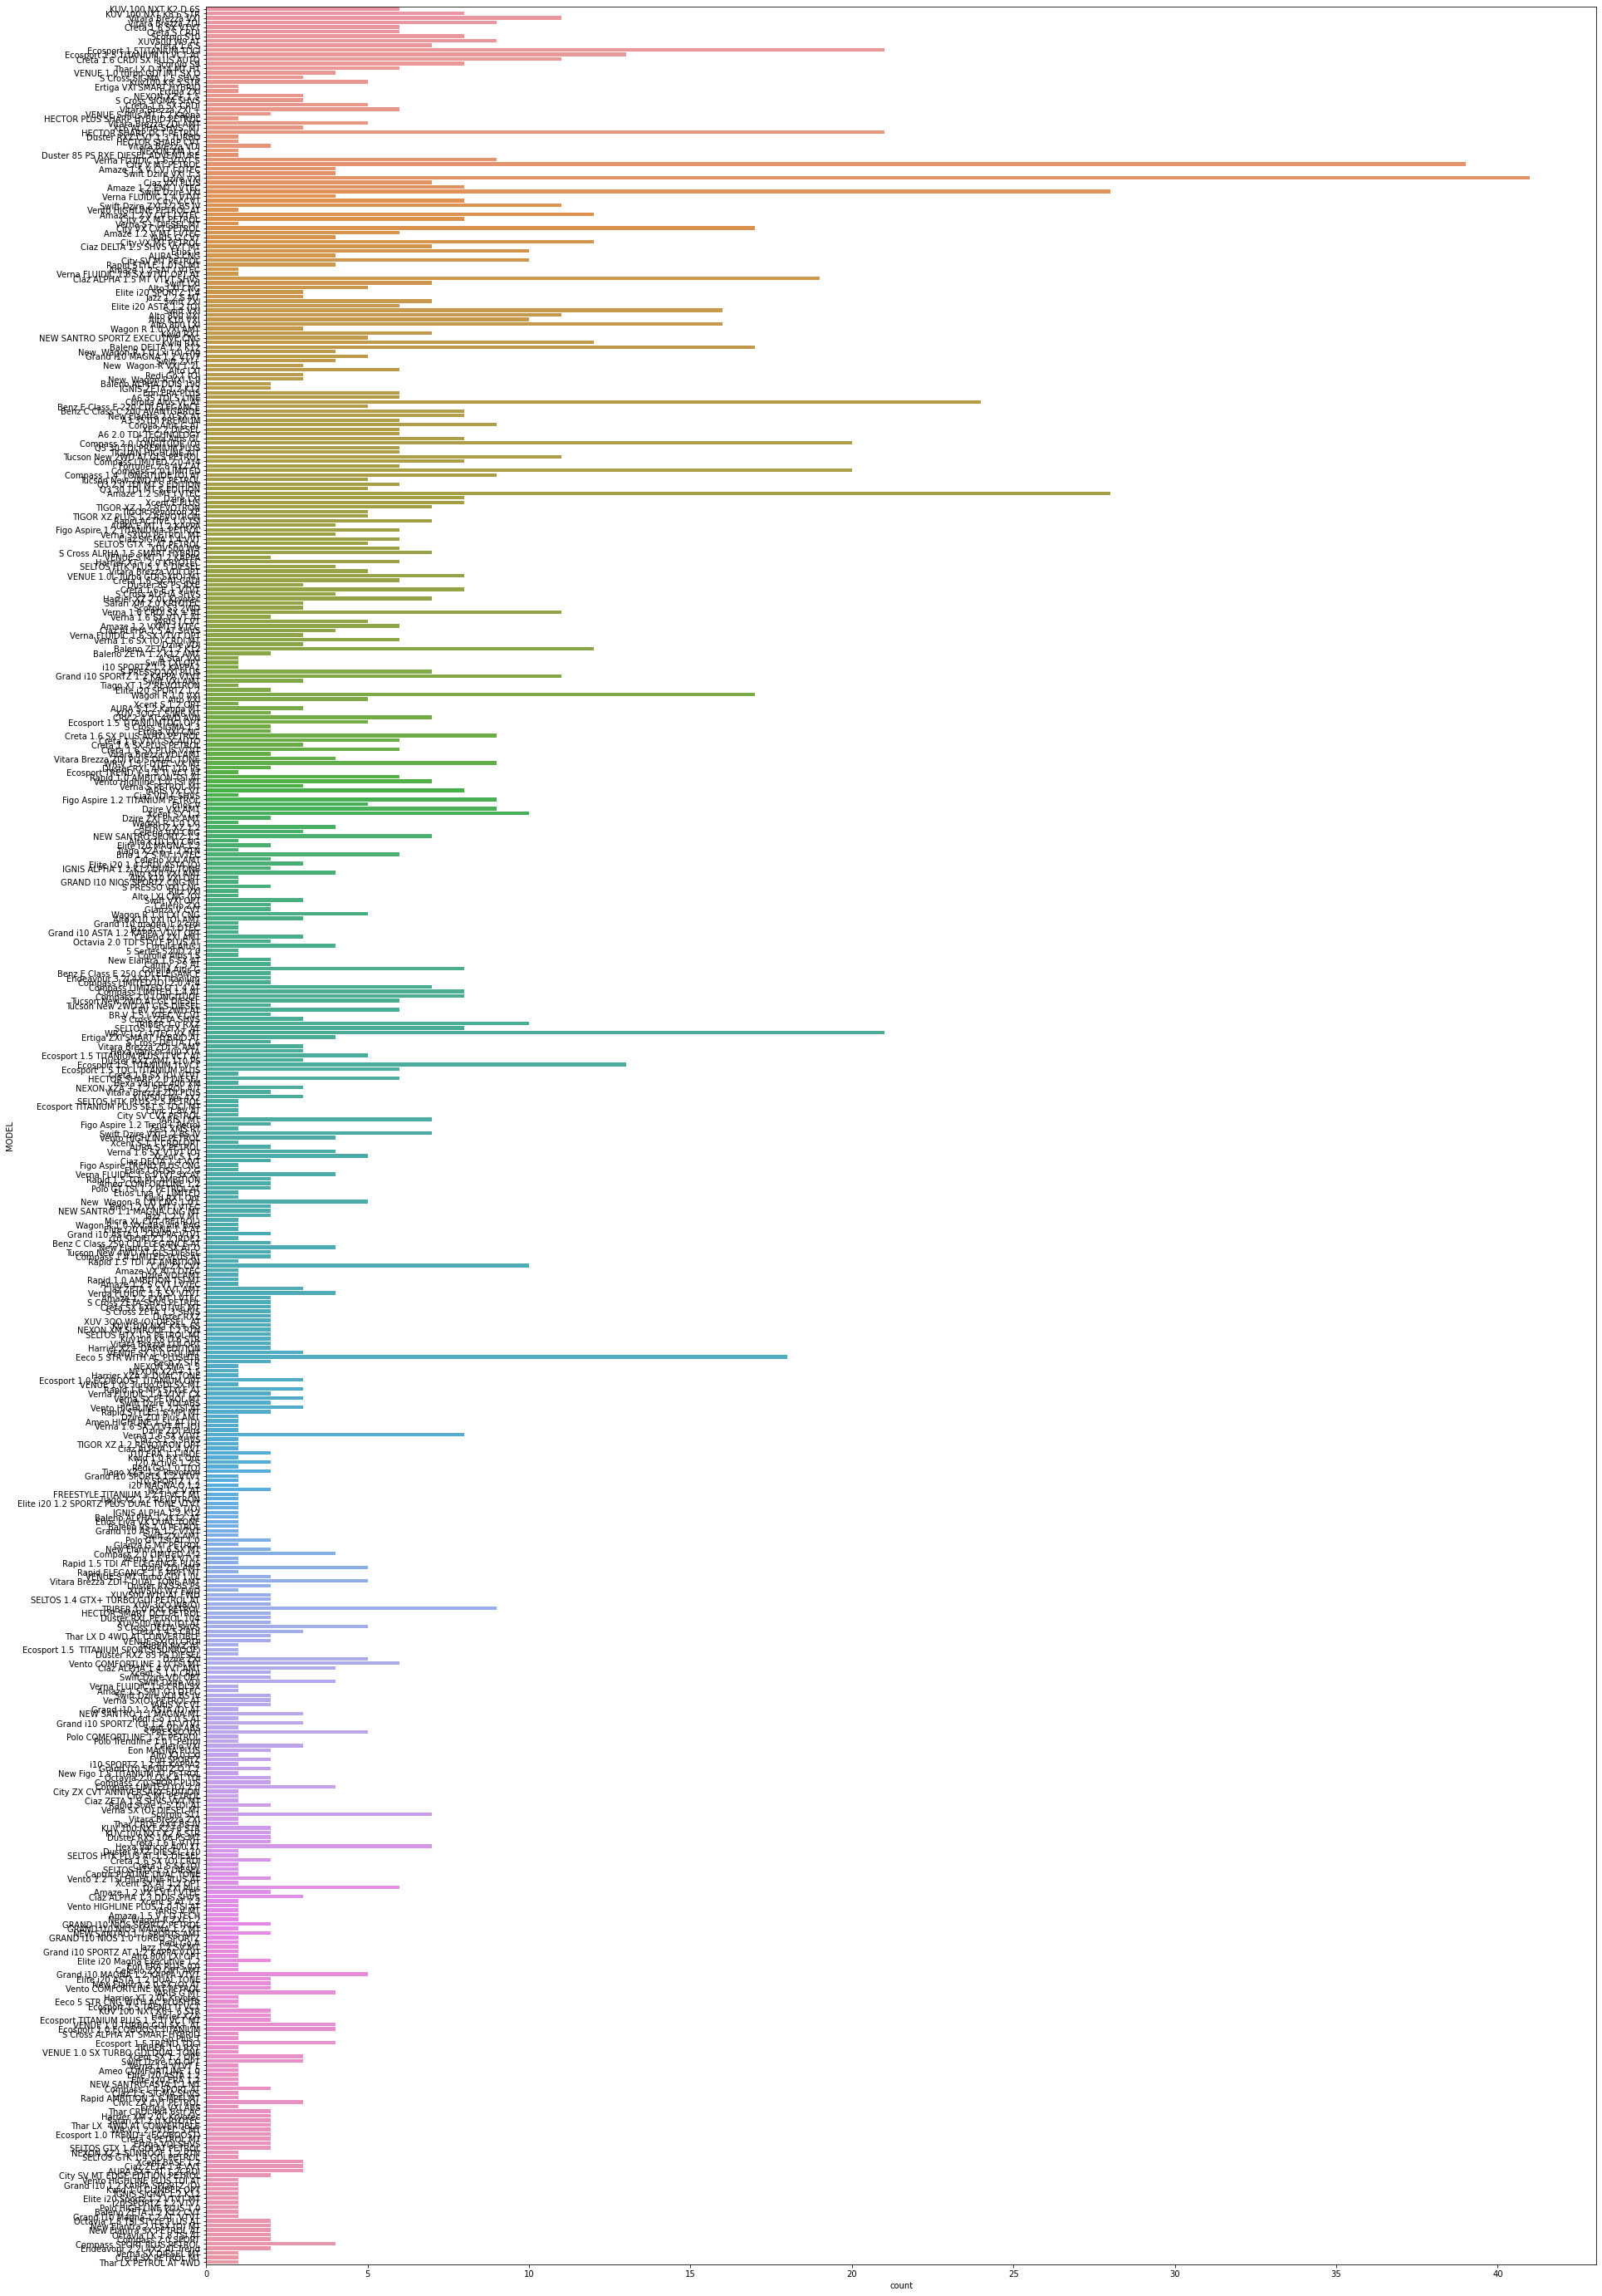

In [27]:
#Count Plot for "Model" column
plt.figure(figsize=(30,50))
sns.countplot(y="MODEL",data=df)

<AxesSubplot:xlabel='MNF_YEAR', ylabel='count'>

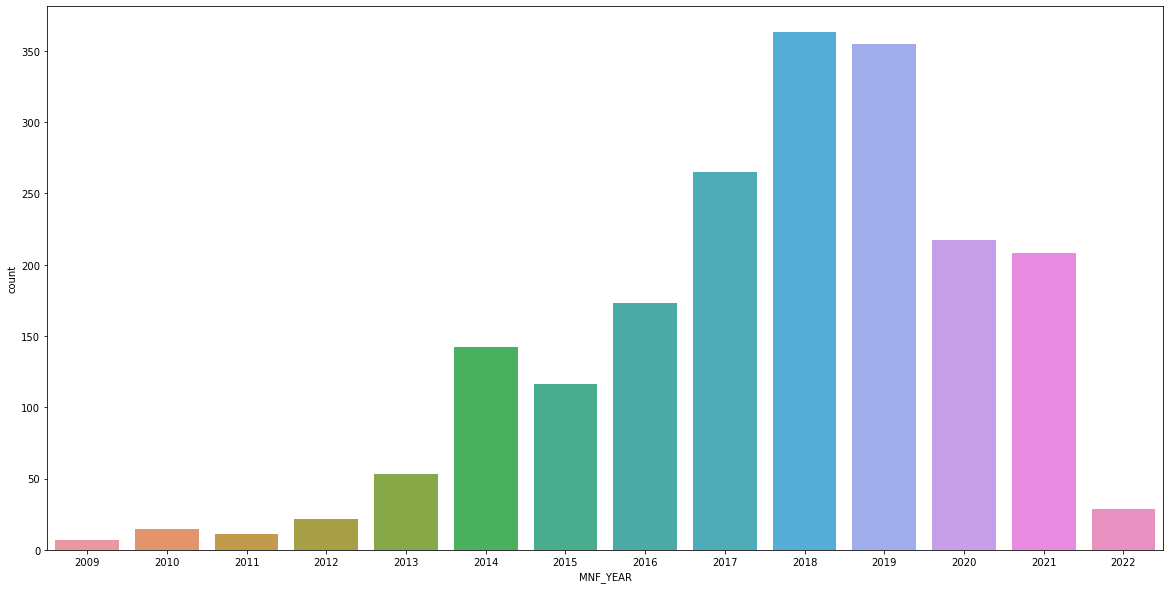

In [28]:
#Count Plot for "MNF_YEAR" column
plt.figure(figsize=(20,10))
sns.countplot(x="MNF_YEAR",data=df)

- We can see that in 2018 and 2019 more cars were manufactured.

<AxesSubplot:xlabel='count', ylabel='FUELTYPE'>

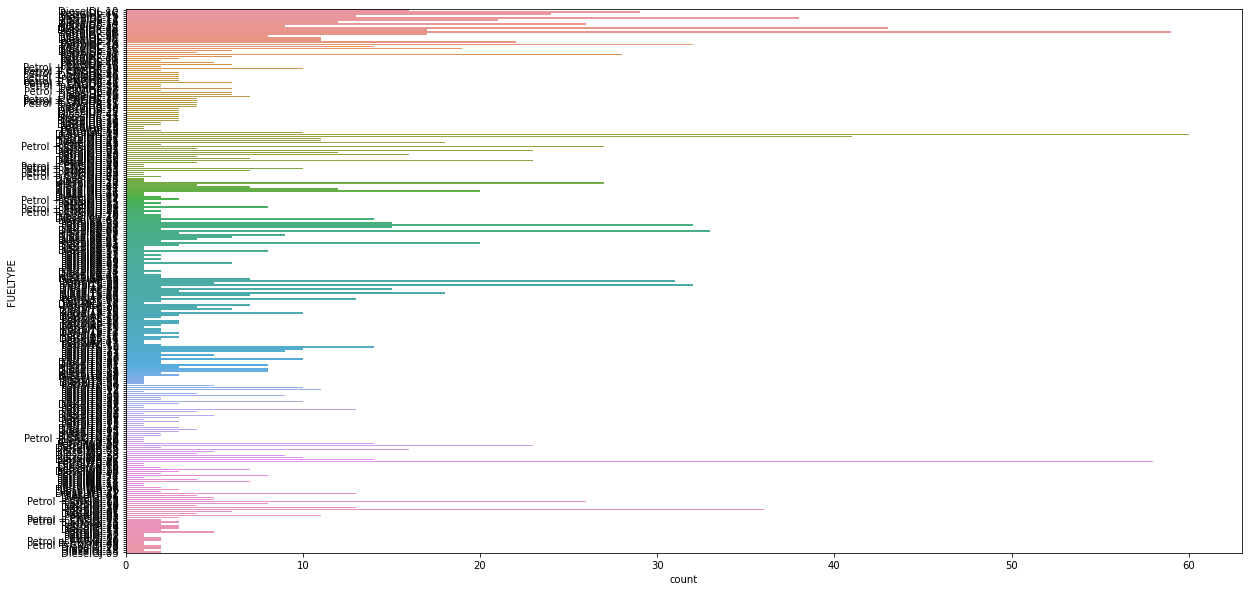

In [29]:
#Count Plot for "Fuel" column
plt.figure(figsize=(20,10))
sns.countplot(y="FUELTYPE",data=df)

<AxesSubplot:xlabel='count', ylabel='VARIANT'>

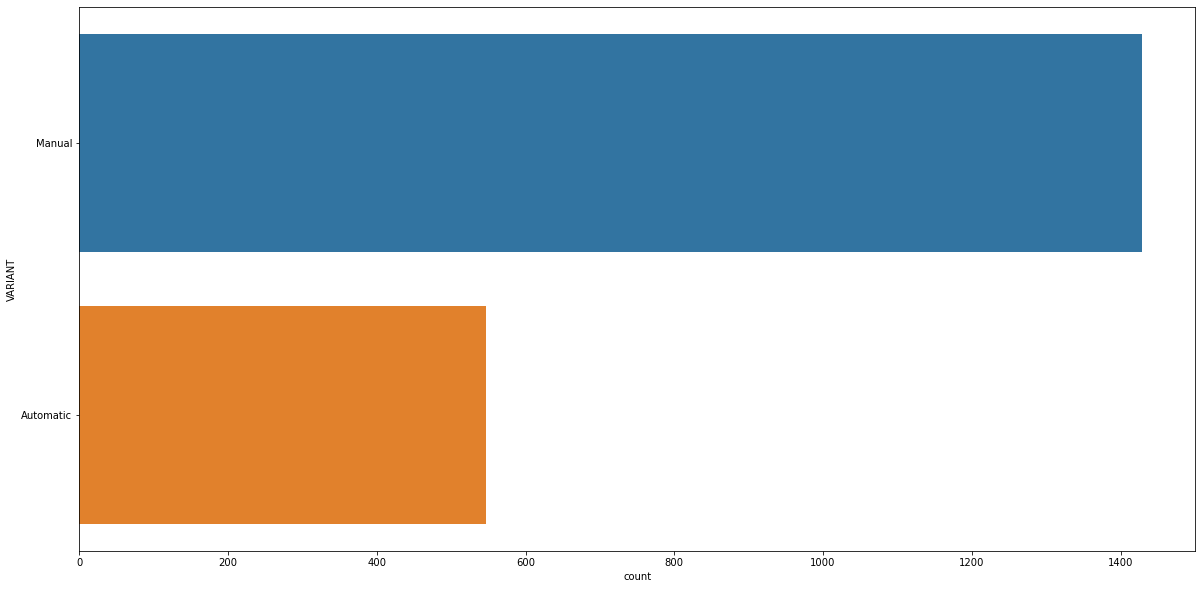

In [30]:
#Count Plot for "VARIANT" column
plt.figure(figsize=(20,10))
sns.countplot(y="VARIANT",data=df)

- We can see that manual cars are high in number.

<AxesSubplot:xlabel='count', ylabel='NOOF_OWNERS'>

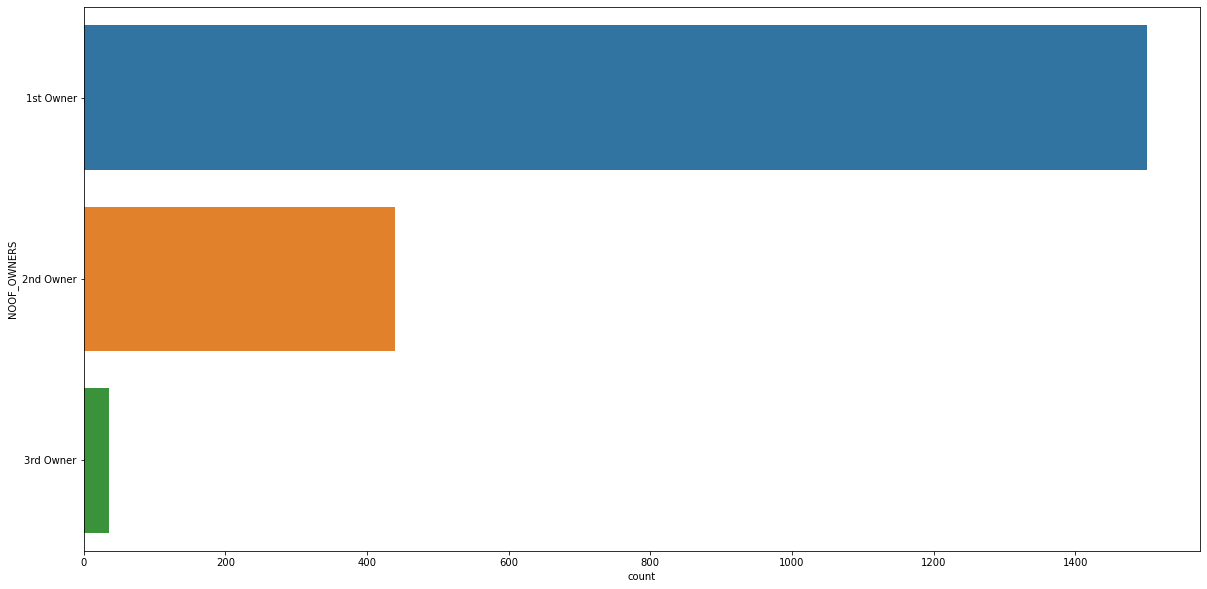

In [31]:
#Count Plot for "NOOF_OWNERS" column
plt.figure(figsize=(20,10))
sns.countplot(y="NOOF_OWNERS",data=df)

- We can see that 1st owners cars are high in number.

### Bivariate Analysis

##### Using Catplot and Scatterplot

<Figure size 1440x4320 with 0 Axes>

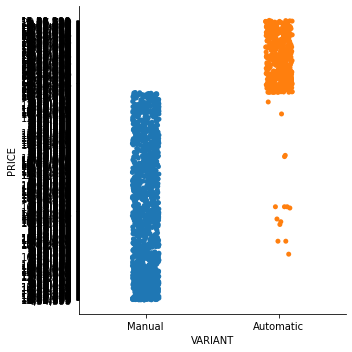

In [34]:
#catplot for comparision between "Variant" column and "Price" column
plt.figure(figsize=(20,60))
sns.catplot(x="VARIANT",data=df, y='PRICE')

<AxesSubplot:xlabel='BRAND', ylabel='PRICE'>

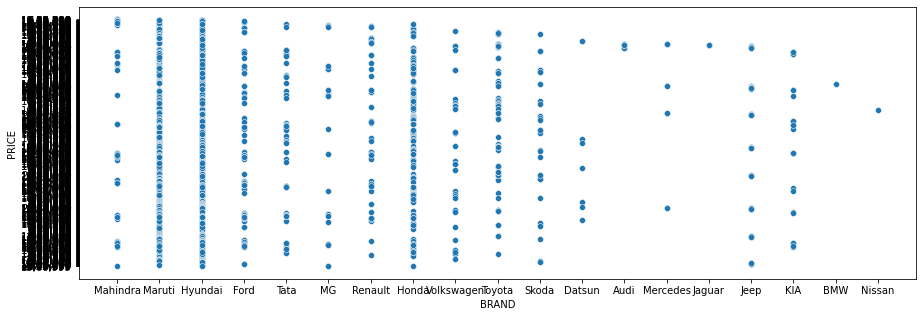

In [36]:
#scatterplot for comparision between "Brand" column and "Car_Price" column
plt.figure(figsize=(15,5))
sns.scatterplot(x="BRAND",data=df, y='PRICE')

<AxesSubplot:xlabel='PRICE', ylabel='MNF_YEAR'>

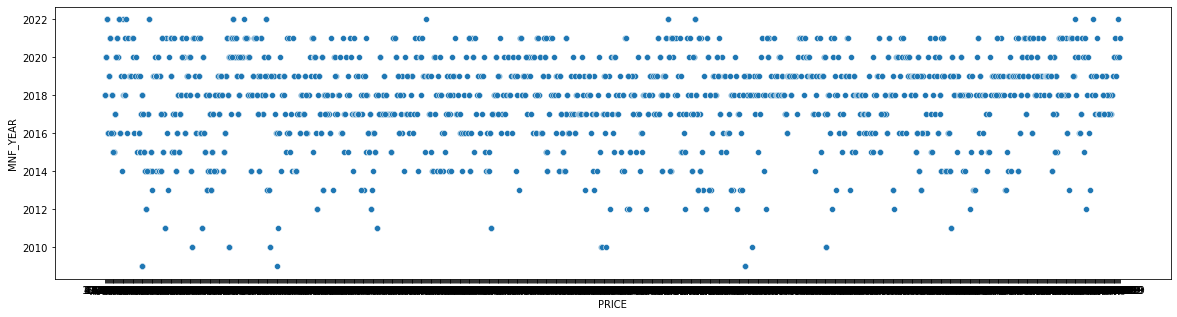

In [37]:
#scatterplot for comparision between "Manufacturing_Year" and "Price" column
plt.figure(figsize=(20,5))
sns.scatterplot(x="PRICE",data=df, y='MNF_YEAR')

### Multivariate Analysis

##### Using pairplot

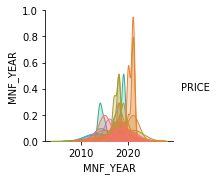

In [38]:
sns.pairplot(df,hue="PRICE")

- We can observe relationship between all the continuous column and the target column by this pairplot in pairs which are plotted on basis of target column.

# Label Encoding

In [40]:
from sklearn.preprocessing  import power_transform, StandardScaler, LabelEncoder
from sklearn.feature_selection import VarianceThreshold, SelectKBest, f_classif
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import roc_curve, auc, roc_auc_score, plot_roc_curve, r2_score, classification_report, mean_absolute_error, mean_squared_error
from sklearn.metrics import confusion_matrix, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

import pickle

In [41]:
#Encoding car Dataset
enc = LabelEncoder()
for i in df.columns:
    if df[i].dtypes=="object":
        df[i]=enc.fit_transform(df[i].values.reshape(-1,1))

In [42]:
df.dtypes

MNF_YEAR       int64
BRAND          int32
MODEL          int32
VARIANT        int32
DRIVEN_KM      int32
FUELTYPE       int32
NOOF_OWNERS    int32
PRICE          int32
dtype: object

# Checking dataset after transformation

In [43]:
df.head()

,MNF_YEAR,BRAND,MODEL,VARIANT,DRIVEN_KM,FUELTYPE,NOOF_OWNERS,PRICE
3,2018,10,254,1,894,4,0,489
4,2020,10,258,1,291,139,0,813
5,2022,11,440,1,1041,252,0,29
6,2016,11,441,1,752,5,0,696
7,2019,5,126,1,55,129,0,131


# Checking Correlation

In [44]:
df.corr()

,MNF_YEAR,BRAND,MODEL,VARIANT,DRIVEN_KM,FUELTYPE,NOOF_OWNERS,PRICE
MNF_YEAR,1.000000,0.116196,0.080389,0.000778,-0.308650,0.046401,-0.282155,0.004078
BRAND,0.116196,1.000000,0.179684,0.014444,-0.007759,0.034530,-0.066588,-0.002007
MODEL,0.080389,0.179684,1.000000,0.064519,0.004141,-0.033388,-0.002141,-0.004097
VARIANT,0.000778,0.014444,0.064519,1.000000,-0.117891,0.075770,-0.018570,0.143736
DRIVEN_KM,-0.308650,-0.007759,0.004141,-0.117891,1.000000,-0.149458,0.112337,0.035178
FUELTYPE,0.046401,0.034530,-0.033388,0.075770,-0.149458,1.000000,-0.033566,0.114358
NOOF_OWNERS,-0.282155,-0.066588,-0.002141,-0.018570,0.112337,-0.033566,1.000000,0.037366
PRICE,0.004078,-0.002007,-0.004097,0.143736,0.035178,0.114358,0.037366,1.000000


This gives the correlation between the denpendent and independent variables.

In [45]:
df.corr()["PRICE"].sort_values()

MODEL         -0.004097
BRAND         -0.002007
MNF_YEAR       0.004078
DRIVEN_KM      0.035178
NOOF_OWNERS    0.037366
FUELTYPE       0.114358
VARIANT        0.143736
PRICE          1.000000
Name: PRICE, dtype: float64

# Checking correlation with heatmap

<AxesSubplot:>

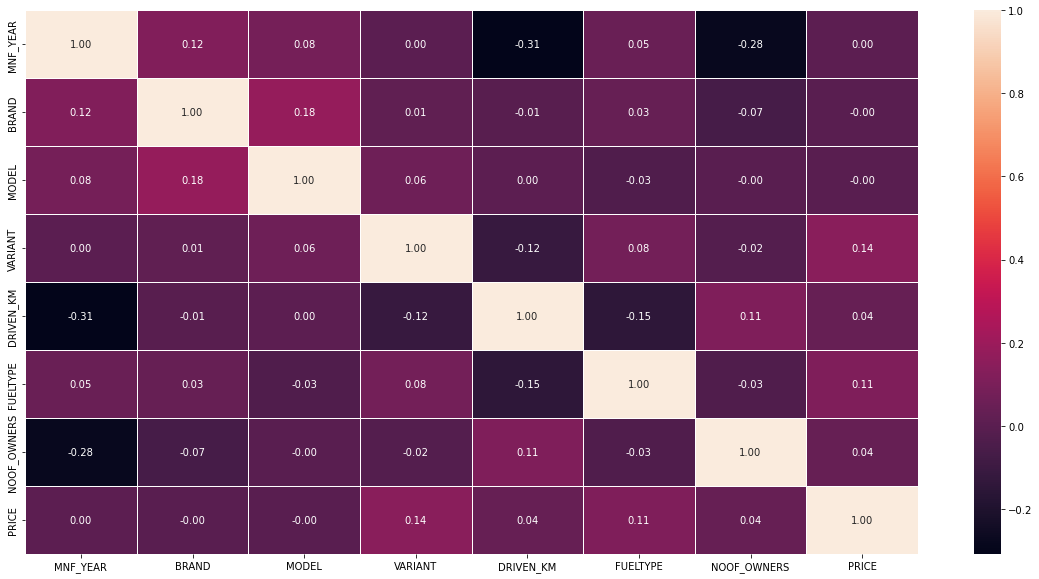

In [46]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True,annot_kws= {"size": 10}, linewidth=0.5, linecolor='white', fmt='.2f')

# Checking correlation with barplot

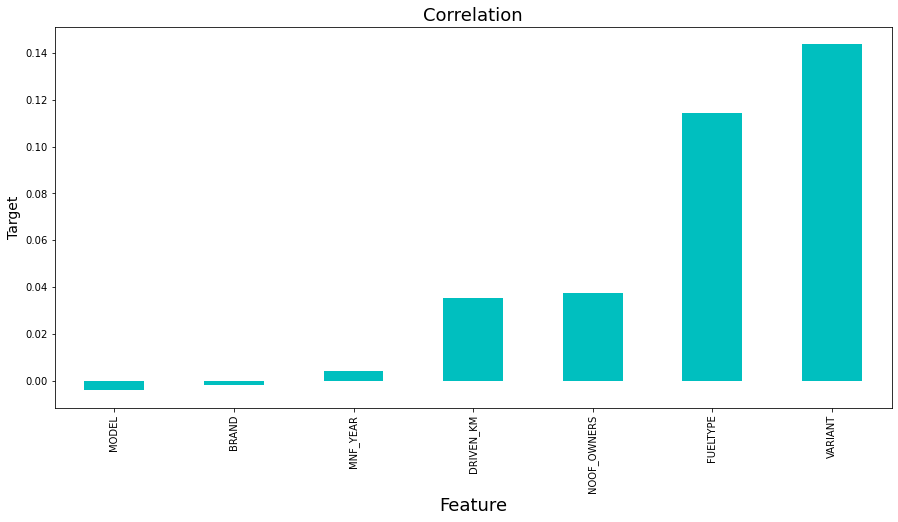

In [47]:
plt.figure(figsize=(15,7))
df.corr()['PRICE'].sort_values(ascending=True).drop(['PRICE']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=18)
plt.ylabel('Target',fontsize=14)
plt.title('Correlation',fontsize=18)
plt.show()

In [49]:
df.columns

Index(['MNF_YEAR', 'BRAND', 'MODEL', 'VARIANT', 'DRIVEN_KM', 'FUELTYPE',
       'NOOF_OWNERS', 'PRICE'],
      dtype='object')

# Checking Outliers

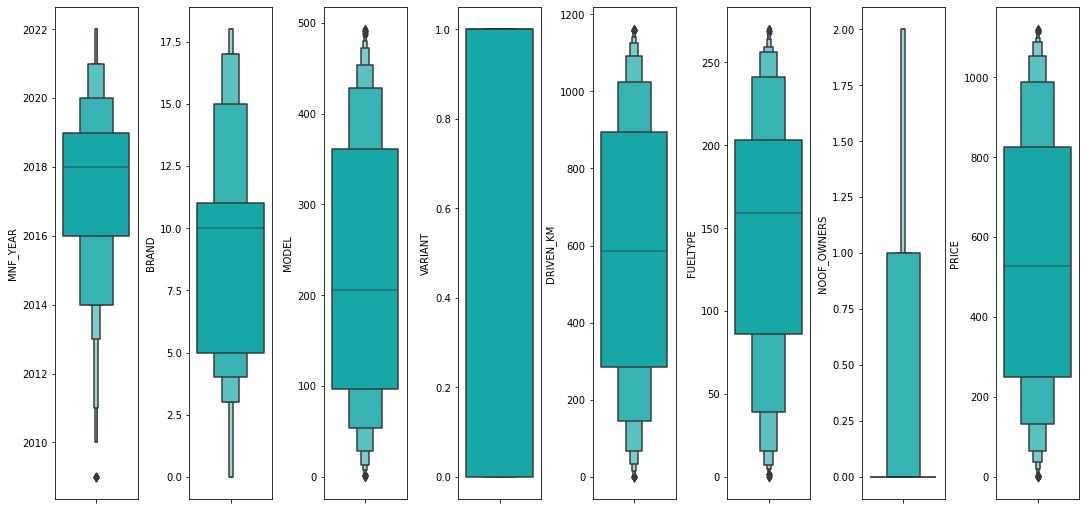

In [52]:
col = ['MNF_YEAR', 'BRAND', 'MODEL', 'VARIANT', 'DRIVEN_KM', 'FUELTYPE','NOOF_OWNERS', 'PRICE']

plt.style.use('fast')

fig, ax = plt.subplots(ncols=8, nrows=1, figsize=(15,7))
index = 0
ax = ax.flatten()
for col, value in df[col].items():
    sns.boxenplot(y=col, data=df, ax=ax[index], color="c")
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.4, h_pad=1.0)
plt.show()

# Checking Skewness

In [54]:
df.skew()

MNF_YEAR      -0.709395
BRAND          0.308017
MODEL          0.194260
VARIANT       -0.998363
DRIVEN_KM     -0.009793
FUELTYPE      -0.309676
NOOF_OWNERS    1.587760
PRICE          0.094410
dtype: float64

# Checking skweness through Data Visualization also

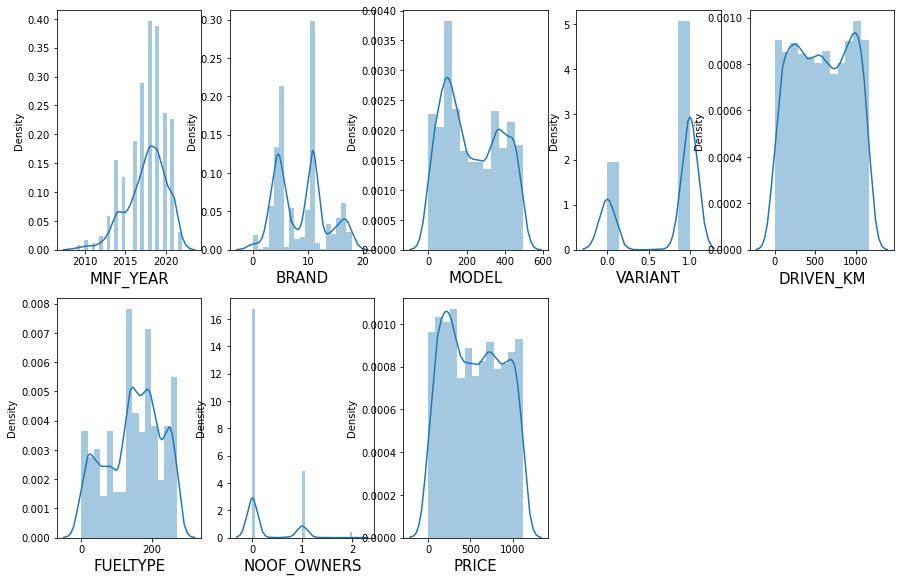

In [55]:
plt.figure(figsize=(15,15), facecolor='white')
plotnumber = 1

for column in df:
    if plotnumber<=15:
        ax = plt.subplot(3,5,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.show()

# Removing skewness using yeo-johnson method

In [56]:
collist=['MNF_YEAR']
df[collist]=power_transform(df[collist],method='yeo-johnson')
df[collist]

,MNF_YEAR
3,0.110579
4,0.969302
5,1.868037
6,-0.709877
7,0.535049
...,...
2015,0.535049
2016,0.969302
2017,1.868037
2018,0.969302


# checking skewness after removal

In [57]:
df.skew()

MNF_YEAR      -0.557934
BRAND          0.308017
MODEL          0.194260
VARIANT       -0.998363
DRIVEN_KM     -0.009793
FUELTYPE      -0.309676
NOOF_OWNERS    1.587760
PRICE          0.094410
dtype: float64

# Checking through Visualization

<AxesSubplot:xlabel='MNF_YEAR', ylabel='Density'>

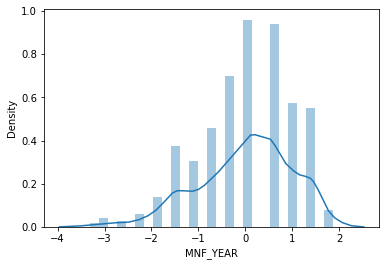

In [58]:
sns.distplot(df['MNF_YEAR'])

# Data preprocessing

### Spliting data into Target and Features

In [59]:
x=df.drop("PRICE",axis=1)
y=df["PRICE"]

In [60]:
x.columns

Index(['MNF_YEAR', 'BRAND', 'MODEL', 'VARIANT', 'DRIVEN_KM', 'FUELTYPE',
       'NOOF_OWNERS'],
      dtype='object')

In [61]:
x.head()

,MNF_YEAR,BRAND,MODEL,VARIANT,DRIVEN_KM,FUELTYPE,NOOF_OWNERS
3,0.110579,10,254,1,894,4,0
4,0.969302,10,258,1,291,139,0
5,1.868037,11,440,1,1041,252,0
6,-0.709877,11,441,1,752,5,0
7,0.535049,5,126,1,55,129,0


In [62]:
y.head()

3    489
4    813
5     29
6    696
7    131
Name: PRICE, dtype: int32

In [63]:
x.shape, y.shape

((1976, 7), (1976,))

# Scaling data using Standard Scaler

In [64]:
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns = x.columns)

In [65]:
x.head()

,MNF_YEAR,BRAND,MODEL,VARIANT,DRIVEN_KM,FUELTYPE,NOOF_OWNERS
0,0.110579,0.271087,0.174455,0.618696,0.907097,-1.888235,-0.541824
1,0.969302,0.271087,0.201704,0.618696,-0.857307,-0.110066,-0.541824
2,1.868037,0.492621,1.441566,0.618696,1.337225,1.378328,-0.541824
3,-0.709877,0.492621,1.448379,0.618696,0.491599,-1.875064,-0.541824
4,0.535049,-0.836581,-0.697536,0.618696,-1.547853,-0.241782,-0.541824


# Checking for Multicolinearity

### VIF (Variance Inflation factor)

In [66]:
vif = pd.DataFrame()
vif['VIF values']= [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['Features'] = x.columns
vif

,VIF values,Features
0,1.214002,MNF_YEAR
1,1.049597,BRAND
2,1.045717,MODEL
3,1.024331,VARIANT
4,1.148116,DRIVEN_KM
5,1.029753,FUELTYPE
6,1.090991,NOOF_OWNERS


### Variance Threshold Method

It removes all features which variance doesn't meet some threshold. By default, it removes all zero-variance features.

In [67]:
var_threshold = VarianceThreshold(threshold=0)
var_threshold.fit(x)

VarianceThreshold(threshold=0)

In [68]:
var_threshold.get_support()

array([ True,  True,  True,  True,  True,  True,  True])

In [69]:
x.columns[var_threshold.get_support()]

Index(['MNF_YEAR', 'BRAND', 'MODEL', 'VARIANT', 'DRIVEN_KM', 'FUELTYPE',
       'NOOF_OWNERS'],
      dtype='object')

In [70]:
# taking  out  all the  constant  columns 
cons_columns = [column for column in x.columns
               if column not in x.columns[var_threshold.get_support()]]
print(len(cons_columns))

0


##### So we can see that, with the help of variance threshold method, we got to know all the features here are important. So, we will create model now.

# Creating Model

### Finding the best random state among all the models

On the basis of target column as it contains continuous data, we will understand this by Regression Problem

In [71]:
maxAcc = 0
maxRS=0
for i in range(1,100):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = .20, random_state = i)
    modDTR =  DecisionTreeRegressor()
    modDTR.fit(x_train,y_train)
    pred = modDTR.predict(x_test)
    acc  = r2_score(y_test,pred)
    if acc>maxAcc:
        maxAcc=acc
        maxRS=i
print(f"Best Accuracy is: {maxAcc} on random_state: {maxRS}")

Best Accuracy is: 0.8044785345169394 on random_state: 78


### Creating train-test-split

In [84]:
# creating new train test split using the random state.
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = .25, random_state = maxRS)

# Regression Algorithm

1. Linear Regression

In [85]:
# Checking r2score for Linear Regression
LR = LinearRegression()
LR.fit(x_train,y_train)

# prediction
predLR=LR.predict(x_test)
print('R2_score:',r2_score(y_test,predLR))
print('Mean abs error:',mean_absolute_error(y_test, predLR))
print('Mean squared error:',mean_squared_error(y_test, predLR))
print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(y_test,predLR)))

R2_score: 0.011797358264030833
Mean abs error: 270.4400160744952
Mean squared error: 100751.73329909945
Root Mean Squared Error:  317.41413531709554


Checking the performance of the model by graph

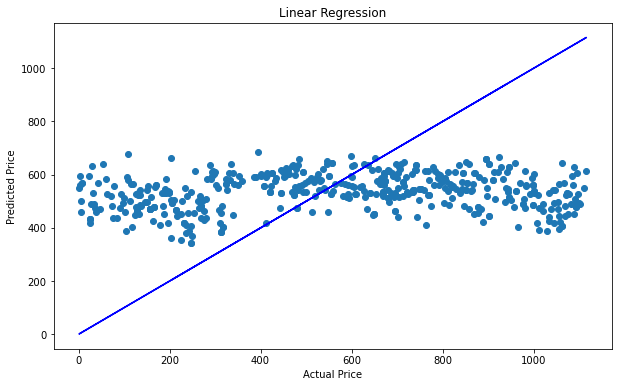

In [86]:
plt.figure(figsize=(10,6))
plt.scatter(x=y_test,y=predLR,cmap='set1')
plt.plot(y_test,y_test,color='b')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Linear Regression")
plt.show()

2. Random forest Regression Model

In [87]:
# Checking R2 score for Random Forest Regressor
RFR=RandomForestRegressor(n_estimators=600, random_state=maxRS)
RFR.fit(x_train,y_train)

# prediction
predRFR=RFR.predict(x_test)
print('R2_Score:',r2_score(y_test,predRFR))
print('Mean abs error:',mean_absolute_error(y_test, predRFR))
print('Mean squared error:',mean_squared_error(y_test, predRFR))
print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(y_test,predRFR)))

R2_Score: 0.7995079694666867
Mean abs error: 83.55072874493926
Mean squared error: 20441.07021754386
Root Mean Squared Error:  142.9722707994241


Checking the performance of the model by graph

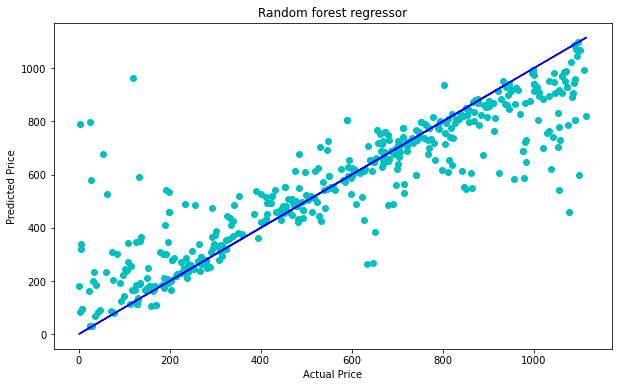

In [88]:
#Verifying the performance of the model by graph
plt.figure(figsize=(10,6))
plt.scatter(x=y_test,y=predRFR,color='c')
plt.plot(y_test,y_test,color='b')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Random forest regressor")
plt.show()

# 3. KNN Regressor

In [89]:
# Checking R2 score for KNN regressor
knn=KNeighborsRegressor(n_neighbors=9 )
knn.fit(x_train,y_train)

#prediction
predknn=knn.predict(x_test)
print('R2_Score:',r2_score(y_test,predknn))
print('Mean abs error:',mean_absolute_error(y_test, predknn))
print('Mean squared error:',mean_squared_error(y_test, predknn))
print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(y_test,predknn)))

R2_Score: 0.22679357814370005
Mean abs error: 212.8459289248763
Mean squared error: 78831.89531164091
Root Mean Squared Error:  280.77018237633587


Checking the performance of the model by graph

Text(0.5, 1.0, 'K-nearest neighbors  regressor')

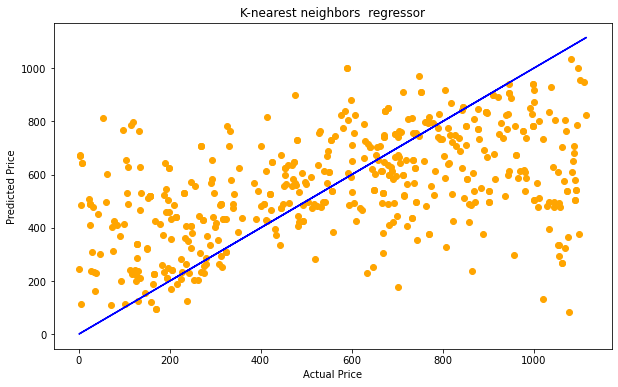

In [90]:
plt.figure(figsize=(10,6))
plt.scatter(x=y_test,y=predknn,color='orange')
plt.plot(y_test,y_test,color='b')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("K-nearest neighbors  regressor")

4. Gradient boosting Regressor

In [91]:
# Checking R2 score for GBR
Gb= GradientBoostingRegressor(n_estimators=400,  random_state=maxRS, learning_rate=0.1, max_depth=3)
Gb.fit(x_train,y_train)

#prediction
predGb=Gb.predict(x_test)
print('R2_Score:',r2_score(y_test,predGb))
print('Mean abs error:',mean_absolute_error(y_test, predGb))
print('Mean squared error:',mean_squared_error(y_test, predGb))
print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(y_test,predGb)))

R2_Score: 0.7082289651928095
Mean abs error: 122.1433215250692
Mean squared error: 29747.377958488127
Root Mean Squared Error:  172.47428202050335


Checking the performance of the model by graph

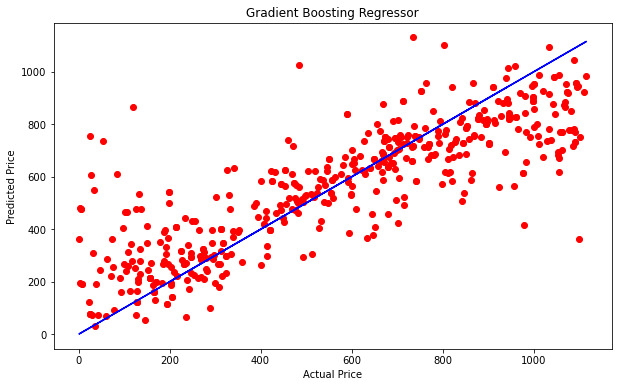

In [92]:
plt.figure(figsize=(10,6))
plt.scatter(x=y_test,y=predGb,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Gradient Boosting Regressor")
plt.show()

5. Decision Tree Regressor

In [93]:
# Checking R2 score for GBR
DTR= DecisionTreeRegressor()
DTR.fit(x_train,y_train)

#prediction
predDTR=DTR.predict(x_test)
print('R2_Score:',r2_score(y_test,predDTR))
print('Mean abs error:',mean_absolute_error(y_test, predDTR))
print('Mean squared error:',mean_squared_error(y_test, predDTR))
print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(y_test,predDTR)))

R2_Score: 0.7106465848566966
Mean abs error: 67.42105263157895
Mean squared error: 29500.89068825911
Root Mean Squared Error:  171.75823324737337


Checking the performance of the model by graph

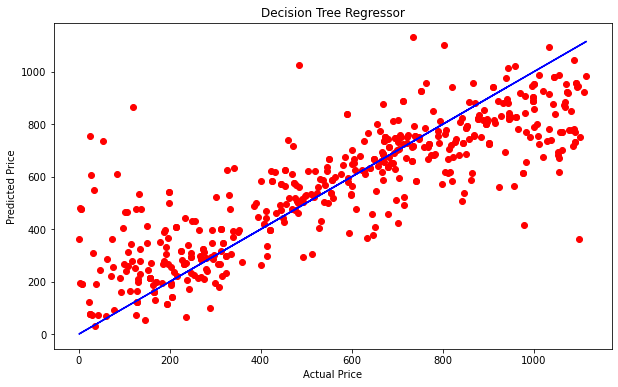

In [94]:
plt.figure(figsize=(10,6))
plt.scatter(x=y_test,y=predGb,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Decision Tree Regressor")
plt.show()

# Cross Validation Score for all the model

In [95]:
#CV Score for Linear Regression
print('CV score for Linear Regression: ',cross_val_score(LR,x,y,cv=5).mean())

#CV Score for Random Forest Regression
print('CV score for Random forest Regression: ',cross_val_score(RFR,x,y,cv=5).mean())

#CV Score for KNN Regression
print('CV score for KNN Regression: ',cross_val_score(knn,x,y,cv=5).mean())

#CV Score for Gradient Boosting Regression
print('CV score for Gradient Boosting Regression: ',cross_val_score(Gb,x,y,cv=5).mean())

#CV Score for Decision Tree Regression
print('CV score for Decision Tree Regression: ',cross_val_score(DTR,x,y,cv=5).mean())

CV score for Linear Regression:  0.008835876344606164
CV score for Random forest Regression:  0.4921820426994647
CV score for KNN Regression:  0.08451350157130193
CV score for Gradient Boosting Regression:  0.4435821041361172
CV score for Decision Tree Regression:  0.1073049929723207


So according to the R2 score and Cross validation score of all the model we can see that the best model is gradient boosting regressor

# Hyper Parameter Tuning

### The Gradient boosting regressor with GridsearchCV

In [96]:
parameter = {'n_estimators':[100,200,300,400],
             'learning_rate':[0.1,0.01,0.001,1],
             'subsample': [0.1,0.2,0.3,0.5,1],
             'max_depth':[1,2,3,4],
             'alpha':[0.1,0.01,0.001,1]}

In [97]:
CV_GBR = GridSearchCV(GradientBoostingRegressor(),parameter,cv=6,n_jobs = 3,verbose = 2)

In [98]:
CV_GBR.fit(x_train,y_train)

Fitting 6 folds for each of 1280 candidates, totalling 7680 fits


GridSearchCV(cv=6, estimator=GradientBoostingRegressor(), n_jobs=3,
             param_grid={'alpha': [0.1, 0.01, 0.001, 1],
                         'learning_rate': [0.1, 0.01, 0.001, 1],
                         'max_depth': [1, 2, 3, 4],
                         'n_estimators': [100, 200, 300, 400],
                         'subsample': [0.1, 0.2, 0.3, 0.5, 1]},
             verbose=2)

In [99]:
CV_GBR.best_params_

{'alpha': 0.1,
 'learning_rate': 0.1,
 'max_depth': 4,
 'n_estimators': 400,
 'subsample': 0.5}

### Creating Regressor Model with Gradient Boosting Regressor

In [100]:
GBR = GradientBoostingRegressor(n_estimators=400, alpha=0.001,learning_rate= 0.1, max_depth= 4, subsample = 0.5)
GBR.fit(x_train, y_train)

GradientBoostingRegressor(alpha=0.001, max_depth=4, n_estimators=400,
                          subsample=0.5)

In [101]:
#prediction
GBRpred = GBR.predict(x_test)
#R2 score
acc = r2_score(y_test,GBRpred)
print(acc*100)

74.71848174992584


#### So after the Hypertuning now we have got a descent accuracy score of 75% on Gradient boosting

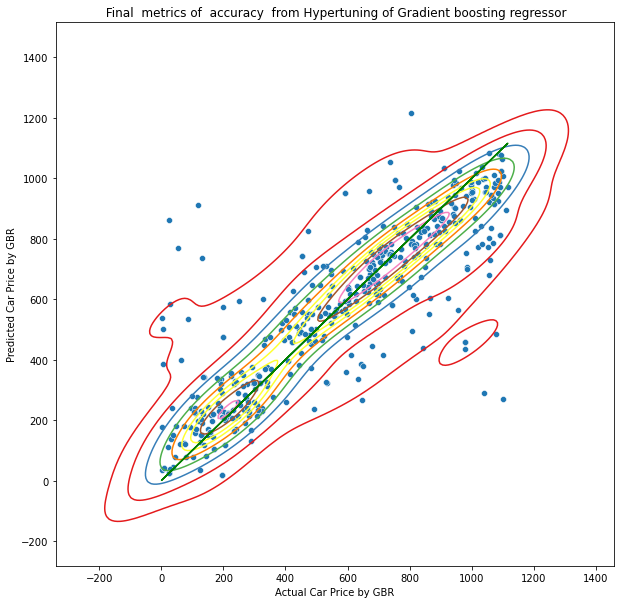

In [103]:
#Verifying the final  performance of the model by graph
plt.figure(figsize=(10,10))
sns.scatterplot(x=y_test,y=GBRpred,palette='Set2')
sns.kdeplot(x=y_test,y=GBRpred, cmap='Set1')
plt.plot(y_test,y_test,color='g')
#Verifying the performance of the model by graph
plt.xlabel("Actual Car Price by GBR")
plt.ylabel("Predicted Car Price by GBR")
plt.title(" Final  metrics of  accuracy  from Hypertuning of Gradient boosting regressor")
plt.show()

# Saving The Predictive Model

In [104]:
#saving the model at local file system
filename='Car_price_prediction.pickle'
pickle.dump(CV_GBR,open(filename,'wb'))
#prediction using the saved model
loaded_model = pickle.load(open(filename, 'rb'))
loaded_model.predict(x_test)

array([ 935.04178928,  766.61167631,  204.42721227,  799.40517662,
        506.13586744,  393.57207835,  393.75537895,  676.63312942,
        503.70693684,  540.39297259,  942.85023397,  627.40098155,
       1021.31469449,  842.64911669,  784.21323687,  659.18025658,
        127.39715067,  617.25520632,  612.20736085,  109.95139695,
         28.94759184,  737.85888172,  367.9924964 ,  987.33312242,
        715.09981041,  577.21735441,  970.28517162,  295.92576544,
        646.99746968,  590.73338555,  204.50705424,  811.17828257,
        953.01087665,  896.25917178,  587.9623213 ,  247.71076751,
       1048.61298058,  169.93003136,  615.05111338,  455.5485444 ,
        889.20934624,  559.02724987,  226.1401673 ,  729.31526009,
        161.24908909,  917.91716008,  240.39564113,  510.79574516,
        931.66483684,  171.98905123,  270.44535045,  896.25917178,
        349.10657843,  762.51775832,  393.75537895,  469.15221266,
        854.2113286 ,  864.62288177,  505.40586475,  977.03798

# Checking predicted and original values

In [105]:
a = np.array(y_test)
predict = np.array(loaded_model.predict(x_test))
Car_price_prediction = pd.DataFrame({"Original":a,"Predicted":predict},index= range(len(a)))
Car_price_prediction

,Original,Predicted
0,940,935.041789
1,703,766.611676
2,163,204.427212
3,884,799.405177
4,476,506.135867
...,...,...
489,653,601.970617
490,1116,1194.708653
491,29,35.809801
492,705,725.773194


# Let's plot and visualize

Text(0.5, 1.0, 'Original vs predicted  graph')

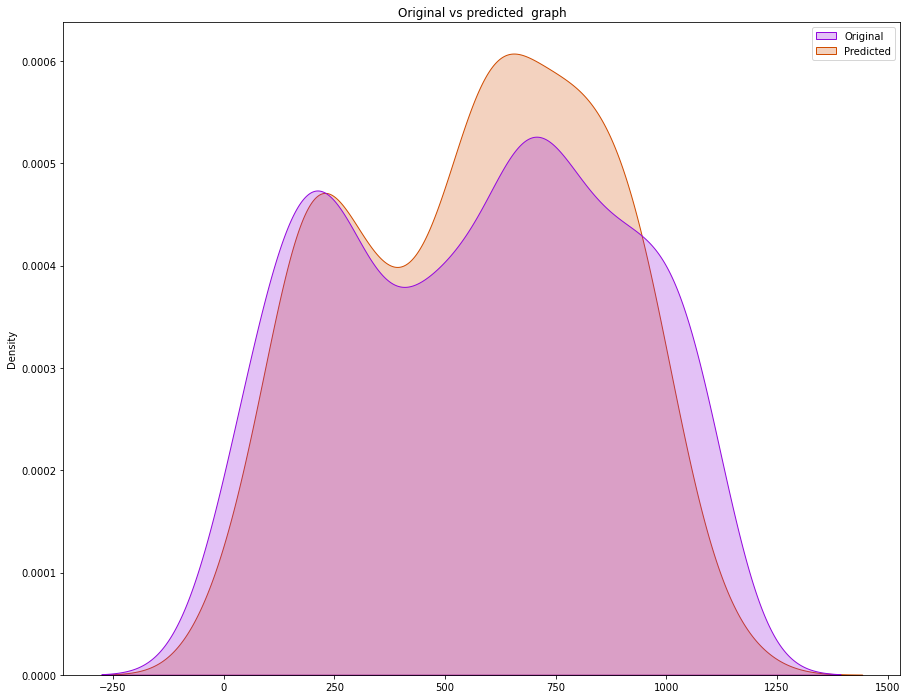

In [106]:
plt.figure(figsize=(15,12))
sns.kdeplot(data=Car_price_prediction, palette='gnuplot',gridsize=900, shade=True)
plt.title('Original vs predicted  graph')

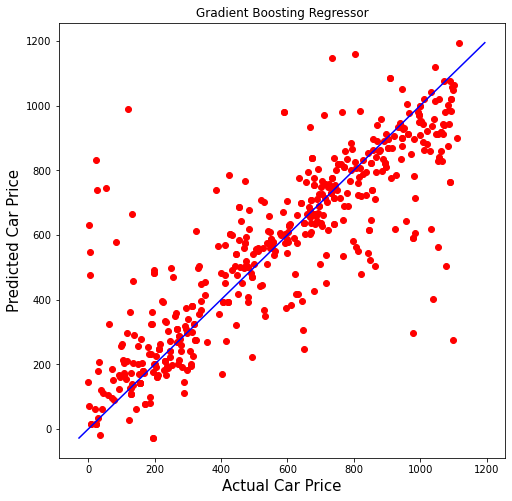

In [107]:
plt.figure(figsize=(8,8))
plt.scatter(y_test,predict,c='r')
plt1 = max(max(predict),max(y_test))
plt2 = min(min(predict),min(y_test))
plt.plot([plt1,plt2],[plt1,plt2],'b-')
plt.xlabel('Actual Car Price',fontsize=15)
plt.ylabel('Predicted Car Price',fontsize=15)
plt.title("Gradient Boosting Regressor")
plt.show()

# Saving the model in CSV format

In [108]:
model =Car_price_prediction.to_csv('car_price_prediction.csv')
model